In [10]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#Created on Fri Dec  1 21:19:50 2017
#@author: yogeshkohli


In [3]:
#Import libraries

import pandas as pd
import numpy as np
import sklearn 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.grid_search import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [4]:
#Loading data from CSV

df = pd.read_csv('mushrooms.csv')
total_size=len(df)


In [5]:
#Encoding data into numbers

labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

X = df.iloc[:,1:23]  # all rows, all the features and no labels
y = df.iloc[:, 0]  # all rows, label only
X.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [7]:
#Spliting training testing data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=4)

In [8]:

Applying RandomForest ALGORITHM
model_RR=RandomForestClassifier()
tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }
RR_model= RandomizedSearchCV(model_RR, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1)
RR_model.fit(X_train,y_train)
y_prob = RR_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
RR_model.score(X_test, y_pred)


1.0

In [13]:
#Calculating Confusion Matrix

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[2084,    0],
       [   5, 1973]])

In [19]:
#Calculating AUC_ROC

auc_roc=metrics.classification_report(y_test,y_pred)
print(auc_roc)
print("\n")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC {}".format(roc_auc))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2084
          1       1.00      1.00      1.00      1978

avg / total       1.00      1.00      1.00      4062



ROC AUC 1.0


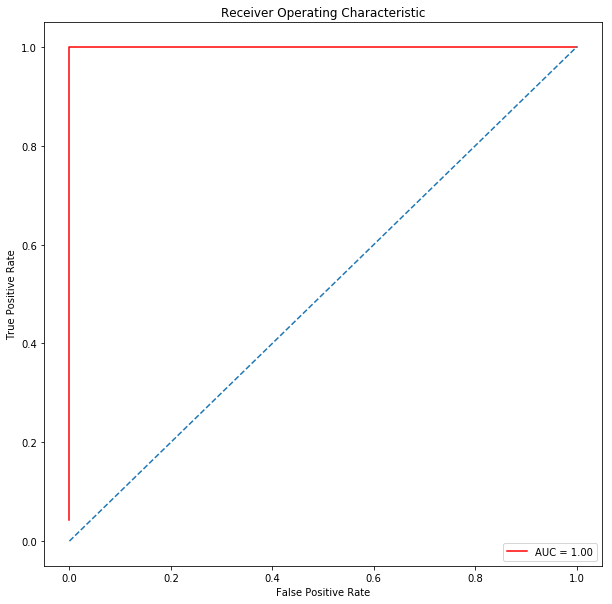

In [22]:
#Plotting

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
